In [1]:
in_file =r'../../data/clean/articles.csv' 

import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
articles=pd.read_csv(in_file,index_col=False)
articles.CR.fillna('',inplace=True)
df_ref=articles.CR
refs_dict={}
i=0
for ref in df_ref:
    refs_dict[i]=[ref for ref in ref.split('; ')]
    i=i+1

In [4]:
cite = open('..\csv\cite_all.csv', 'w')
cite.write('citing,cited\n')

for row in refs_dict:
    for ref in refs_dict[row]:
        cite.write(str(row)+','+ ref.replace(',','')+'\n')
cite.close()

In [6]:
cite_all=pd.read_csv('..\csv\cite_all.csv')
cite_all.fillna('',inplace=True)

In [7]:
dg=cite_all.groupby('cited').count()
dg1=dg[dg.citing==1]
dg=dg[dg.citing>2]
dg.reset_index(inplace=True)

In [8]:
cite_all['cited_id']=-1
i=0
dg_cited=dg.cited.values
for x in cite_all.cited:
    try:
        ind=dg[dg.cited==x].index[0]
        cite_all.set_value(i,'cited_id',ind)
    except:
        pass
    i=i+1
    if i % 1000 ==0:
        print i,
print

1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000 66000 67000 68000 69000 70000 71000 72000 73000 74000 75000 76000 77000 78000 79000 80000 81000 82000 83000 84000 85000 86000 87000 88000 89000


In [9]:
cite_all=cite_all[cite_all.cited_id>-1]

In [13]:
df=cite_all[['citing','cited_id']]
df.to_csv('..\csv\cite_all_id.csv',index=False)

In [15]:
df=pd.read_csv('..\csv\cite_all_id.csv')

In [16]:
x=df.citing.max()
y=df.cited_id.max()
mm=np.zeros((x+1,y+1))
mm.shape

(1207L, 5978L)

In [17]:
for row in df.iterrows():
    mm[row[1][0],row[1][1]]=1

In [18]:
#bib=np.triu(np.dot(mm,mm.transpose()),1)
bib = 1-pairwise_distances(mm, metric="cosine")
bib = np.round(np.triu(bib,1),3)
bib.shape

(1207L, 1207L)

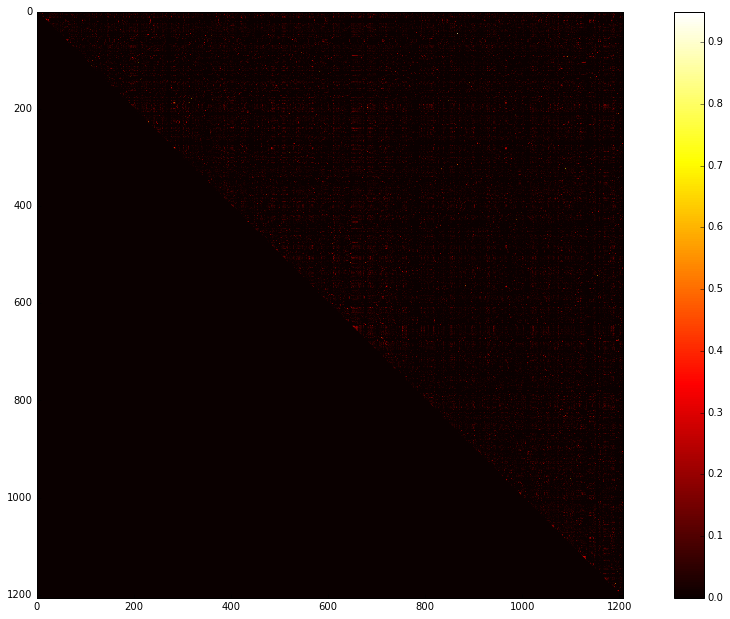

In [33]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.imshow(bib, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [36]:
biblio = open('../csv/bib.csv', 'w')
biblio.write('source,target,weight,type\n')

for row in range(bib.shape[0]):
    for col in range(row,bib.shape[1]):
        if bib[row][col] > .1:
            biblio.write(str(row)+','+str(col)+','+str(bib[row][col])+',undirected\n')
biblio.close()

In [50]:
bib_df=pd.read_csv('../csv/bib.csv')
bib_df=bib_df[bib_df.weight>.2]
bib_df.shape

(2095, 4)

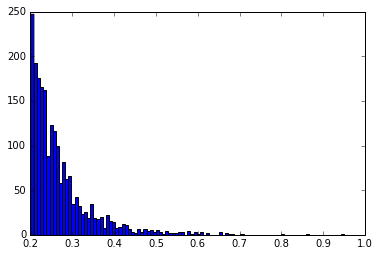

In [51]:
l=bib_df.weight
hist=plt.hist(l,100)

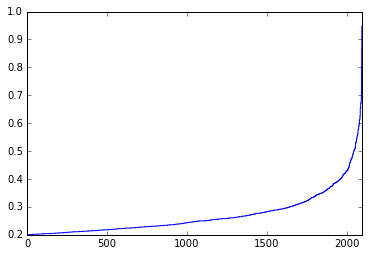

In [52]:
l=l.sort_values()
l=l.reset_index(drop=True)
l.plot(drawstyle='steps')

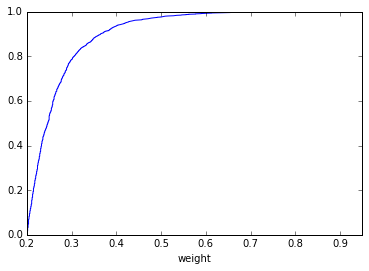

In [53]:
cum_dist = np.linspace(0.,1.,len(l))
cdf = pd.Series(cum_dist, index=l)
cdf.plot()

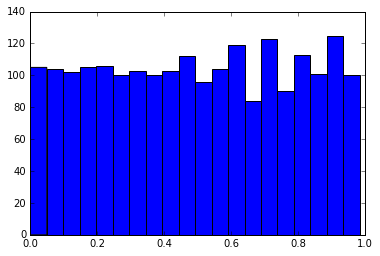

In [54]:
dic=cdf.to_dict()
bib_df['p']=bib_df.weight.apply(lambda x :1- dic[x])
p=bib_df[bib_df.weight>0].p
binwidth=.01
hist=plt.hist(p,20)

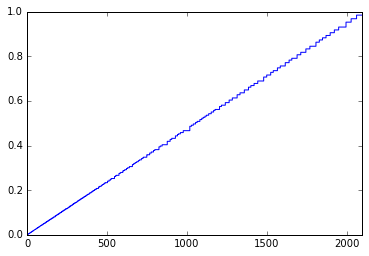

In [55]:
p=bib_df.p
p=p.sort_values()
p=p.reset_index(drop=True)
p.plot(drawstyle='steps')

In [56]:
bib_df.shape

(2095, 5)

In [57]:
bib_df['old_weight']=bib_df.weight
bib_df.drop('weight',inplace=True,axis=1)
bib_df['weight']=1-bib_df.p
bib_df[['source','target','weight','type']].to_csv('..\csv\p_bib.csv',index=False)

In [58]:
bib_df.sort('weight',ascending=False)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,source,target,type,p,old_weight,weight
6723,341,1195,undirected,0.000000,0.949,1.000000
1088,46,864,undirected,0.000478,0.866,0.999522
2722,129,137,undirected,0.000955,0.800,0.999045
6408,323,1086,undirected,0.001433,0.707,0.998567
13632,1152,1194,undirected,0.001910,0.680,0.998090
7016,366,608,undirected,0.002388,0.674,0.997612
2819,137,148,undirected,0.002865,0.671,0.997135
2723,129,148,undirected,0.002865,0.671,0.997135
2238,106,208,undirected,0.003820,0.655,0.996180
8872,500,635,undirected,0.003820,0.655,0.996180
